In [4]:
from ann import Network 
from load_data import load_mnist
from utils import normalize 

In [5]:
train , test = load_mnist() 

Every pixel has a value in 0-256. Here we divided each pixel value by 256 to get the values in 0-1 interval.
This is critical. I couldn't get passed 85% without doing this. The reason is that the higher the activation values are the easier a neuron saturates. Hence the training becomes harder. This might look trivial, It wasn't obvious to me at first. 
Note that instead of division by 256, you might as well use standardization. I was thinking on my feet at that time, and division was the first thing that hit me.  

In [6]:
train , test = normalize(train) , normalize(test) 

In [ ]:
net = Network([784 , 100 ,10]) 
results = \
net.SGD(
    train ,
    epochs=30 ,
    lambda_=3.0,
    eta=0.1,
    test=test,
    monitor_training_cost=True,
    monitor_training_accuracy=True,
    monitor_test_cost=True,
    monitor_test_accuracy=True,
)

You can run the code with smaller hidden layer size for faster results. Alternatively use net.load method to load 9800.json.

In [24]:
import json 
f = open("../data/result.json" , "r") 
data = json.load(f)

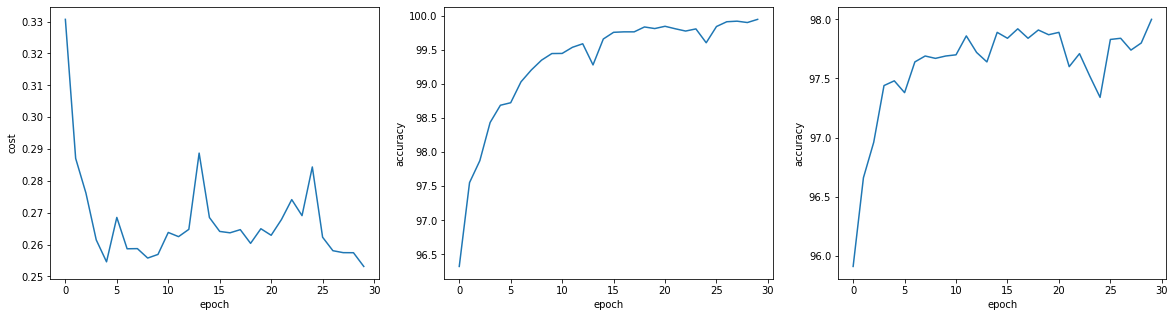

In [16]:
import matplotlib.pyplot as plt 
import numpy as np
fig , axs = plt.subplots(1 , 3 , figsize=(20 , 5))
axs[0].set_xlabel("epoch")
axs[0].set_ylabel("cost")
axs[0].plot(data["train_cost"])

axs[1].set_xlabel("epoch")
axs[1].set_ylabel("accuracy")
axs[1].plot(np.array(data["train_accuracy"]) / len(train[0]) * 100 )

axs[2].set_xlabel("epoch")
axs[2].set_ylabel("accuracy")
axs[2].plot(np.array(data["test_accuracy"]) / len(test[0]) * 100 )

I got much smoother results with a smaller lambda_. But I had to train for more epochs to get past 98% accuracy on the test set. 

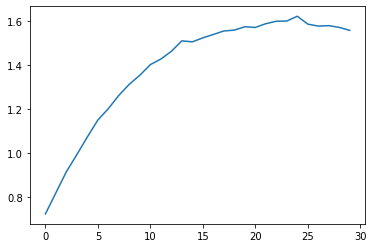

In [22]:
plt.ylabel = "cost"
plt.xlabel = "epoch"
plt.plot(np.array(data["test_cost"]))

The cost is increasing, meaning the model is not learning and hasn't generalized well. But this isn't the case, since the accuracy on the test date is increasing. But why is the cost increasing when accuracy is increasing ? </br> 
In our regularized version of cost function, we take into account the weight terms. It's true that the acuracy is increasing but the weights are also increasing and compensates for decrease in the cost function caused by increase in accuracy. This isn't what's happening with the train data, since the model is learning much better than the test. you can remove the weight terms in the cost function. It won't change the learning process, because we computed the derivatives ourselves. 